In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
# Load the dataset
data = pd.read_excel('D:/HRISHABH/Mentorness internship/task2/data (1).xlsx')

# Display the first few rows of the dataset
print(data.head())

# Display the structure of the dataset
print("\nSTRUCTURE",data.info())

# Summary statistics of the dataset
print("\nDESCRIPTION",data.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5 

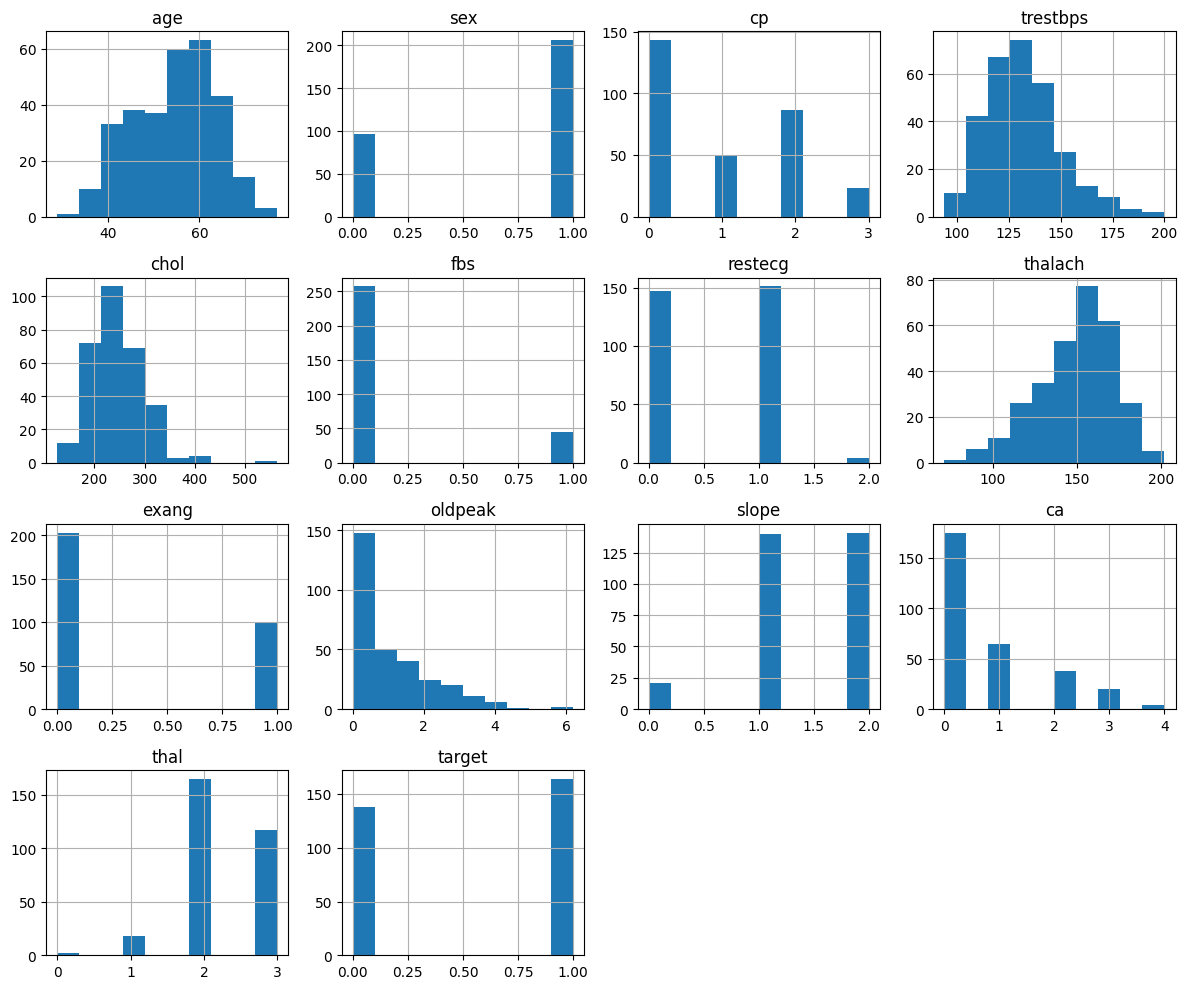

In [3]:
# Plot histograms for each feature
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [4]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data_cleaned = data.dropna()

# Handling outliers (example using IQR method for 'chol' column)
Q1 = data_cleaned['chol'].quantile(0.25)
Q3 = data_cleaned['chol'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_cleaned['chol'] < (Q1 - 1.5 * IQR)) | (data_cleaned['chol'] > (Q3 + 1.5 * IQR)))
print(f"Number of outliers in 'chol': {outliers.sum()}")

# Remove outliers
data_cleaned = data_cleaned[~outliers]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Number of outliers in 'chol': 5


In [5]:
# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data_cleaned, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Display the first few rows of the encoded dataset
print(data_encoded.head())

# Ensure 'target' is the last column for convenience
columns = [col for col in data_encoded.columns if col != 'target'] + ['target']
data_encoded = data_encoded[columns]

# Display the structure of the encoded dataset
print(data_encoded.info())


   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target   cp_1  \
0   63    1       145   233    1      150      0      2.3   0       1  False   
1   37    1       130   250    0      187      0      3.5   0       1  False   
2   41    0       130   204    0      172      0      1.4   0       1   True   
3   56    1       120   236    0      178      0      0.8   0       1   True   
4   57    0       120   354    0      163      1      0.6   0       1  False   

    cp_2   cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2  \
0  False   True      False      False    False    False    True   False   
1   True  False       True      False    False    False   False    True   
2  False  False      False      False    False     True   False    True   
3  False  False       True      False    False     True   False    True   
4  False  False       True      False    False     True   False    True   

   thal_3  
0   False  
1   False  
2   False  
3   False  
4   Fals

**MODEL DEVELOPMENT**

In [6]:
# Define features and target
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 237
Testing set size: 60


In [7]:
# Initialize the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [8]:
# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"XGBoost Model:\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1}\n Classification Report:\n{report}")

XGBoost Model:
 Accuracy: 0.7833333333333333
 Precision: 0.8620689655172413
 Recall: 0.7352941176470589
 F1 Score: 0.7936507936507936
 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        26
           1       0.86      0.74      0.79        34

    accuracy                           0.78        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.80      0.78      0.78        60



In [9]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV for XGBoost
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_predictions = best_model.predict(X_test)
best_model_accuracy = accuracy_score(y_test, best_model_predictions)
best_model_precision = precision_score(y_test, best_model_predictions)
best_model_recall = recall_score(y_test, best_model_predictions)
best_model_f1 = f1_score(y_test, best_model_predictions)
best_model_report = classification_report(y_test, best_model_predictions)

print(f"Best Model (XGBoost):\n Accuracy: {best_model_accuracy}\n Precision: {best_model_precision}\n Recall: {best_model_recall}\n F1 Score: {best_model_f1}\n Classification Report:\n{best_model_report}")
print(f"Best Hyperparameters: {best_params}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Model (XGBoost):
 Accuracy: 0.7833333333333333
 Precision: 0.8888888888888888
 Recall: 0.7058823529411765
 F1 Score: 0.7868852459016393
 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        26
           1       0.89      0.71      0.79        34

    accuracy                           0.78        60
   macro avg       0.79      0.80      0.78        60
weighted avg       0.81      0.78      0.78        60

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


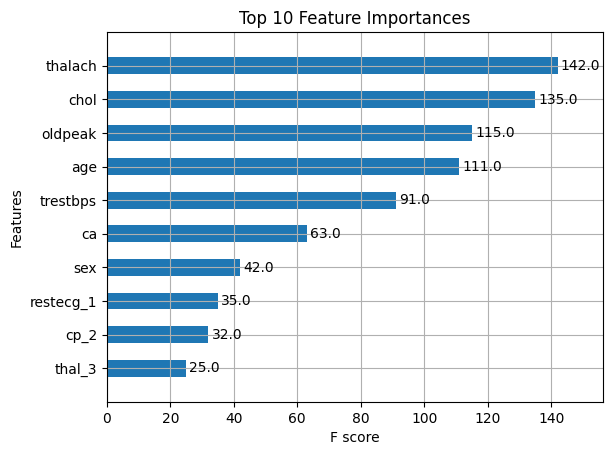

In [10]:
# Plot feature importance
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Top 10 Feature Importances')
plt.show()

In [11]:
best_model.save_model(r'D:\HRISHABH\Mentorness internship\task2\best_xgboost_model.h5')

C:\Users\user\anaconda3\envs\GPU\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
